In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.colors as colors

In [ ]:
def QDA_score(X,MU_k,SIGMA,pi_k): 
    #Returns the value of the linear discriminant score function for a given class "k" and 
    # a given x value X
    
    SIGMA_inv = np.linalg.inv(SIGMA)
    
    return (np.log(pi_k) - 1/2 * np.log(np.linalg.det(SIGMA_inv)) - 1/2 * (X - MU_k).T @ SIGMA_inv @ (X - MU_k)).flatten()[0]

In [ ]:
def predict_QDA_class(X,MU_list,SIGMA_list,pi_list): 
    #Returns the class for which the the linear discriminant score function is largest
    scores_list = []
    classes = len(MU_list)
    
    for p in range(classes):
        score = QDA_score(X.reshape(-1,1),MU_list[p].reshape(-1,1),SIGMA_list[p],pi_list[p]) 
        scores_list.append(score)
             
    return np.argmax(scores_list)

In [ ]:
iris = sns.load_dataset("iris")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


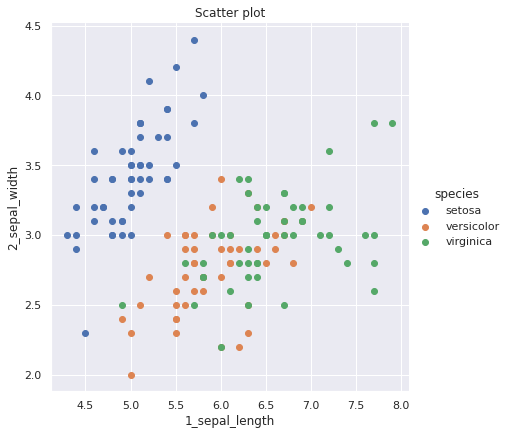

In [ ]:
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
sns.FacetGrid(iris, hue="species", size=6) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_data,y_labels)

QuadraticDiscriminantAnalysis(store_covariance=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have

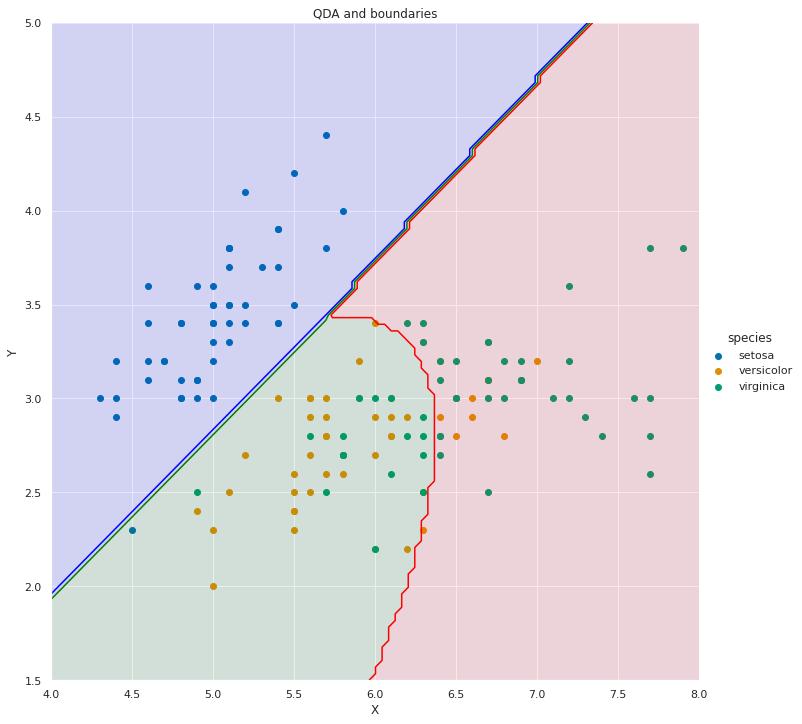

In [ ]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
sigma_list = np.split(df1.groupby('species').cov().values,[2,4], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [qda.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('X')
my_ax.set_ylabel('Y')
my_ax.set_title('QDA and boundaries')

plt.show()